In [1]:
%pip install opencv-python matplotlib numpy
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


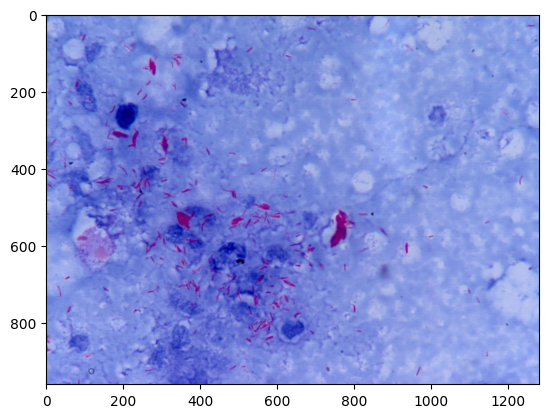

In [7]:
img = cv.imread("../UnLabelled/1.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Orignal Image


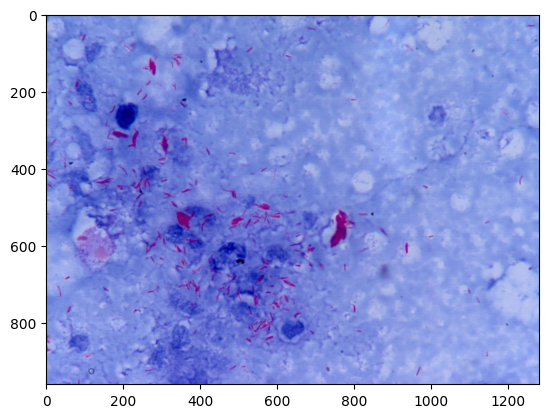

Contoured image: 


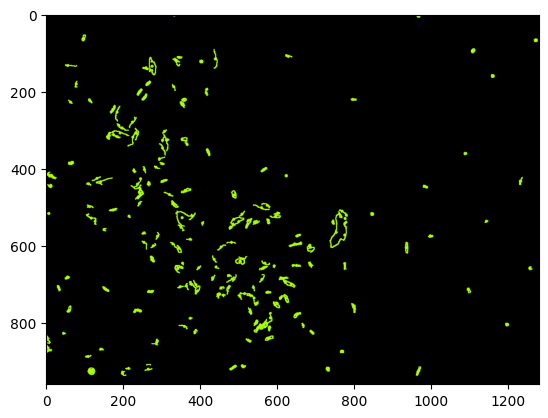

Img with Contours


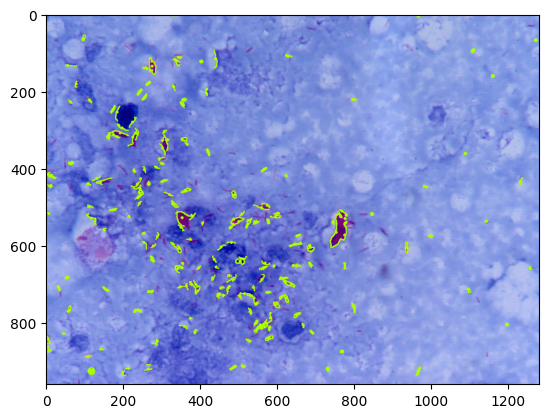

In [8]:
#Now to major problem 2 

#figuring out a way to distinguish bacteria to focus on is a problem that has many solutions, but right now 
# no one way stands out to me since you need to run several tests in different conditions to 
# get an idea of an optimal approach

# You can probably train a neural network to do it for you, but the whole reason we are even considering using 
# opencv is because "In terms of data, we have no data".

#Right now what I am implementing is not fancy or anything because you can probably use a correctly tune
# edge detection algo to get better results, but this is just to get something working

# So here's how it works , We get the contours of the image and then we focus the contour parts of the image
# This ensures that we have no dependence on color since , with scalability 
# since if we use color this will be a pain in the ass to do for different bacteria

#GETTING THE CONTOURS
def getContours(threshold):
    src_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    canny_output = cv.Canny(src_gray, threshold, threshold * 2)


    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours

def draw_img(contours,threshold, img): 
    copy_img = img
    src_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Get the moments
    mu = [None]*len(contours)
    for i in range(len(contours)):
        mu[i] = cv.moments(contours[i])
    # Get the mass centers
    mc = [None]*len(contours)
    for i in range(len(contours)):
        # add 1e-5 to avoid division by zero
        mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
    
    #Drawing
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    for i in range(len(contours)):
        color = (170,255,0)
        cv.drawContours(drawing, contours, i, color, 2)
        cv.drawContours(copy_img, contours, i, color, 2)
        cv.circle(drawing, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)
        cv.circle(copy_img, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)
        
    plt.imshow(drawing)
    plt.show()
    print("Img with Contours")
    plt.imshow(copy_img)
    plt.show()
    return copy_img

threshold = 110
print("Orignal Image")
plt.imshow(img)
plt.show()

print("Contoured image: ")
new_img = draw_img(getContours(threshold),threshold, img)